In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD, PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_curve, f1_score, auc
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv(r'average_train.csv')
train = train.iloc[:,1:]
train.shape

(162, 533)

In [3]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]

X_train.shape, y_train.shape

((162, 532), (162, 1))

In [4]:
test = pd.read_csv(r'average_test.csv')
test = test.iloc[:,1:]
test.shape

(28, 533)

In [5]:
X_test = test.iloc[:,:532]
y_test = test.iloc[:,-1:]

X_test.shape, y_test.shape

((28, 532), (28, 1))

In [11]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('impute', KNNImputer()),
                 ('RFC', RandomForestClassifier())])

In [6]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('impute', KNNImputer()),
                 ('xbg', XGBClassifier(
                            base_score=0.5,
                            booster='gbtree',
                            colsample_bylevel=1,
                            colsample_bynode=1,
                            colsample_bytree=0.5,
                            eta=0.4,
                            gamma=1,
                            gpu_id=-1,
                            importance_type='gain',
                            interaction_constraints='',
                            learning_rate=0.400000006,
                            max_delta_step=0,
                            max_depth=6,
                            max_leaves=7,
                            min_child_weight=1,
                            missing=np.nan,
                            monotone_constraints='()',
                            n_estimators=200, #200 graident boosted trees
                            n_jobs=0,
                            num_parallel_tree=1,
                            objective='reg:logistic',
                            random_state=0,
                            reg_alpha=0,
                            reg_lambda=0.625,
                            scale_pos_weight=1,
                            subsample=0.5,
                            tree_method='auto',
                            validate_parameters=1,
                            verbose=-10,
                            verbosity=0))])

In [12]:
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
prob = pipe.predict_proba(X_test)[:,1]

c:\Users\Afzal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


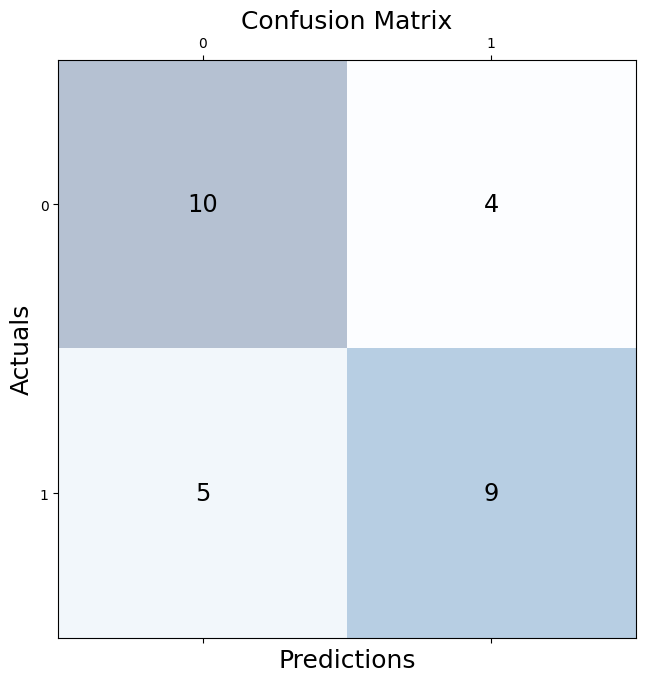

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.69      0.64      0.67        14

    accuracy                           0.68        28
   macro avg       0.68      0.68      0.68        28
weighted avg       0.68      0.68      0.68        28



In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


print(classification_report(y_true=y_test, y_pred=pred))

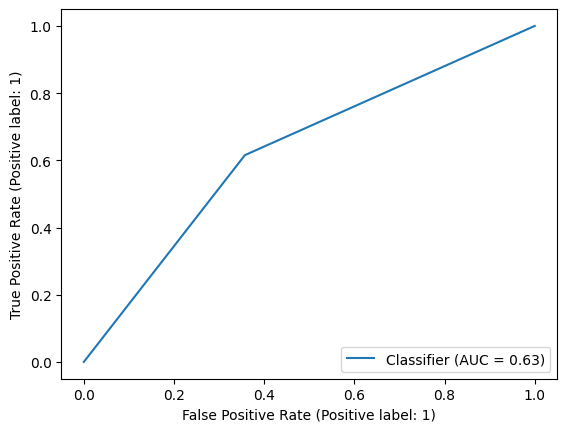

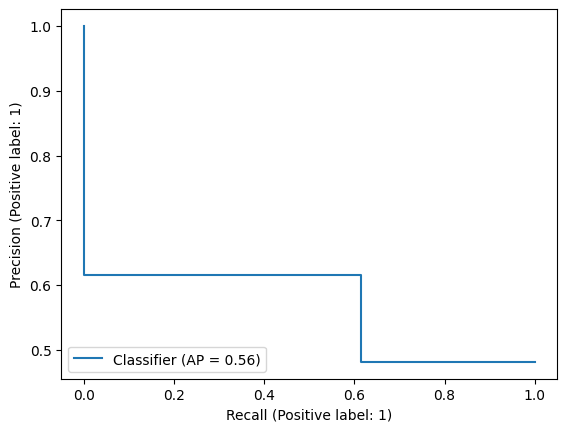

In [10]:
RocCurveDisplay.from_predictions(y_test, pred)
PrecisionRecallDisplay.from_predictions(y_test, pred)

plt.show()

C:\Users\Afzal\AppData\Local\Temp\ipykernel_15600\1716308482.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


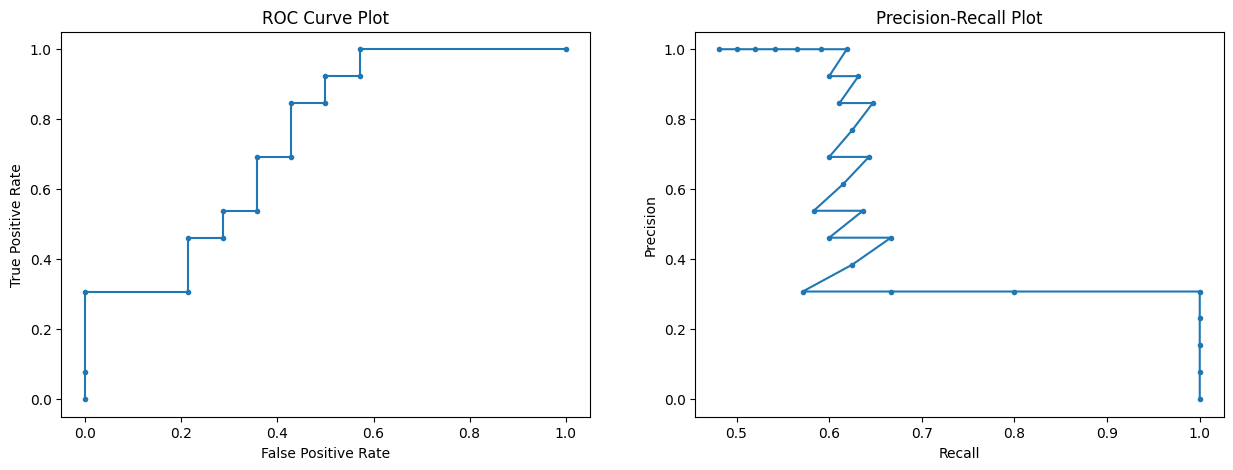

In [11]:
fpr, tpr, _ = roc_curve(y_test, prob)
precision, recall, _ = precision_recall_curve(y_test, prob)

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
plt.plot(precision, recall, marker='.')
plt.title('Precision-Recall Plot')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

In [12]:
print('ROC AUC=%.3f' % (roc_auc_score(y_test, prob)))
print('F1 SCORE=%.3f' % (f1_score(y_test, pred)))
print('RP AUC=%.3f' % (auc(recall, precision)))

ROC AUC=0.742
F1 SCORE=0.615
RP AUC=0.736


In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

k_folds = StratifiedKFold(n_splits=5)

scores = cross_val_score(pipe, X_train, y_train, cv=k_folds)
mean_score = scores.mean()

print(mean_score)
print(scores)


0.5679924242424242
[0.45454545 0.66666667 0.4375     0.65625    0.625     ]


In [9]:
joblib.dump(pipe, 'my_blink_model.pkl', compress=9)

['my_blink_model.pkl']

In [10]:
import numpy as np
import pandas as pd
import itertools
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import TruncatedSVD, PCA
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_curve, f1_score, auc
import matplotlib.pyplot as plt
import pickle
import joblib

In [11]:
blink = joblib.load('my_blink_model.pkl')

In [17]:
test = pd.read_csv(r'average_test.csv')
test = test.iloc[:,1:]
test.shape

(27, 533)

In [18]:
X_test = test.iloc[:,:532]
y_test = test.iloc[:,-1:]

X_test.shape, y_test.shape

((27, 532), (27, 1))

In [12]:
pred = blink.predict(X_test)
prob = blink.predict_proba(X_test)[:,1]

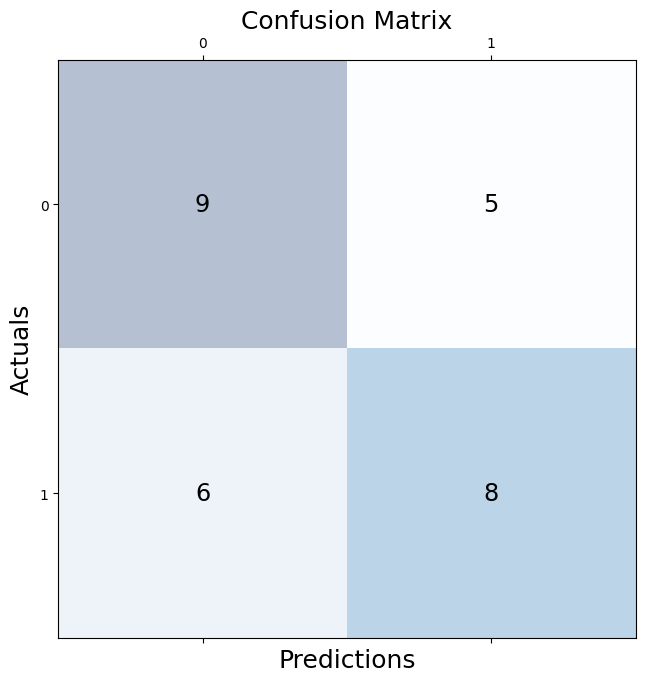

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.62      0.57      0.59        14

    accuracy                           0.61        28
   macro avg       0.61      0.61      0.61        28
weighted avg       0.61      0.61      0.61        28



In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


print(classification_report(y_true=y_test, y_pred=pred))